In [1]:
#pip install pygraphviz

     |████████████████████████████████| 122kB 2.4MB/s eta 0:00:01
  ERROR: Complete output from command /Users/opheliebleu/anaconda3/bin/python -u -c 'import setuptools, tokenize;__file__='"'"'/private/var/folders/gn/_b6n_d6s485cx0r6r9db1_800000gn/T/pip-install-puqzgy92/pygraphviz/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/gn/_b6n_d6s485cx0r6r9db1_800000gn/T/pip-wheel-avx19lbp --python-tag cp37:
  ERROR: running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.macosx-10.7-x86_64-3.7
  creating build/lib.macosx-10.7-x86_64-3.7/pygraphviz
  copying pygraphviz/scraper.py -> build/lib.macosx-10.7-x86_64-3.7/pygraphviz
  copying pygraphviz/graphviz.py -> build/lib.macosx-10.7-x86_64-3.7/pygraphviz
  copying pygraphviz/__init__.py -> build/lib.macosx-10.7-x86_64-3.7/pygraphviz
  copying pygr

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pygraphviz as pgv

In [12]:
G = pgv.AGraph()

In [13]:
node_list = [i for i in range(400)]

In [14]:
G.add_nodes_from(node_list)

In [7]:
#G.node_attr["shape"] = "circle"
#G.edge_attr["color"] = "red"

In [145]:


#ajoute les noeuds
import random
p = 0.5
q = 0.02

    
def tirage(p,q):
    G = pgv.AGraph()
    G = nx.Graph()
    node_list = [i for i in range(400)]
    G.add_nodes_from(node_list)
    dicoNeigh = {}
    for j in range(400):
        for k in range(j+1,400):
            if k-j<100:
                #tirage dans le même groupe
                tirage = random.random()
                if tirage <= p:
                    G.add_edge(j, k, color ="blue")
                    if j in dicoNeigh:
                        dicoNeigh[j].add(k)
                    else :
                        dicoNeigh[j] = {k}
                    if k in dicoNeigh :
                        dicoNeigh[k].add(j)
                    else : 
                        dicoNeigh[k] = {j}
            else : 
                #tirage pour groupes différents
                tirage = random.random()
                if tirage <= q:
                    G.add_edge(j, k, color ="red")
                    if j in dicoNeigh:
                        dicoNeigh[j].add(k)
                    else :
                        dicoNeigh[j] = {k}
                    if k in dicoNeigh :
                        dicoNeigh[k].add(j)
                    else : 
                        dicoNeigh[k] = {j}
    return dicoNeigh, G
   
dicoNeigh, G = tirage(p,q)


In [ ]:
#compute dicoNeigh for other graphs


In [87]:
#Fisher Yates shuffle
def FisherYatesShuffle (listeToShuffle, nbNodes): 
    for i in range(nbNodes-1,0,-1): 
        j = random.randint(0,i) 
        listeToShuffle[j], listeToShuffle[i] = listeToShuffle[i], listeToShuffle[j] 
    return listeToShuffle

In [170]:
#dicoNeigh = {1:{2,3,4}, 2:{1,3}, 3:{1,2}, 4:{1,5,6}, 5:{4,6}, 6:{4,5}}
from collections import defaultdict

def labelPropagation(dicoNeigh):
    nbNodes = max(dicoNeigh.keys())+1 #ajout artificiel drun zéro au cas où le noeud 0 est présent
    label = []
    #attribution d'un label unique pour chaque noeud si le noeud est relié au graphe
    for i in range(0, nbNodes):
        if i in dicoNeigh:
            label.append(i)
        else:
            #noeud non relié au graphe
            label.append(-1)
    continueIteration = True
    nbIter = 0
    while continueIteration:
        nbChange = 0
        listToShuffle = [i for i in range(nbNodes)]
        listShuffle = FisherYatesShuffle(listToShuffle, nbNodes)
        for node in listShuffle:
            if node in dicoNeigh:
                neighbours = dicoNeigh[node]
                dicoLabel = {}
                for neigh in neighbours:
                    if label[neigh] in dicoLabel:
                        dicoLabel[label[neigh]]+=1
                    else : 
                        dicoLabel[label[neigh]]=1
                dicoLabel_inverted = defaultdict(list)
                {dicoLabel_inverted[v].append(k) for k, v in dicoLabel.items()}
                dicoInverted = dict(dicoLabel_inverted)
                maxKey = max(dicoInverted.keys())
                #maxNumber = max(dicoLabel.values())
                #setLabelMax = set()
                #for key in dicoLabel.keys():
                #    if dicoLabel[key]==maxNumber:
                #        setLabelMax.add(key)
                #regarde si label déjà présent
                if label[node] not in dicoInverted[maxKey]:
                    #label[node] = setLabelMax.pop()
                    label[node] = random.choice(dicoInverted[maxKey])
                    nbChange +=1

        if nbChange == 0:
            continueIteration = False
        nbIter +=1
        
    return label  

label = labelPropagation(dicoNeigh)
print(label)

[101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 253, 253, 101, 253, 253, 101, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,

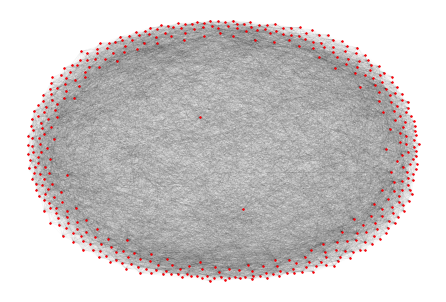

In [104]:
pos = nx.spring_layout(G)
options = {
    "node_color": "blue",
    "node_size": 2,
    "linewidths": 0,
    "width": 0.01,
}
nx.draw(G, pos, **options)
nx.draw_networkx_nodes(G, pos,  node_size=2, node_color="r")
plt.show()

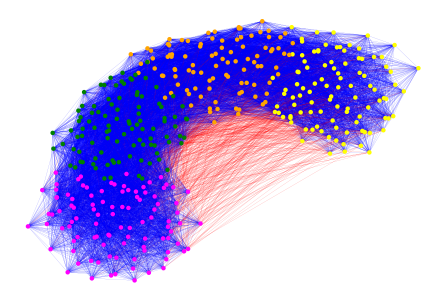

In [152]:
import networkx as nx

def colorNode(number):
    if number < 100:
        return 'yellow'
    elif number < 200:
        return 'orange'
    elif number < 300:
        return 'green'
    else : 
        return 'magenta'

options = {
    #"node_color": "black",
    "node_size": 20,
    "linewidths": 0,
    "width": 0.08,
}
edges = G.edges()
colorNodes = [colorNode(i) for i in range(400)]
colors = [G[u][v]['color'] for u,v in edges]
nx.draw(G, edges = edges,node_color = colorNodes, edge_color = colors, **options)

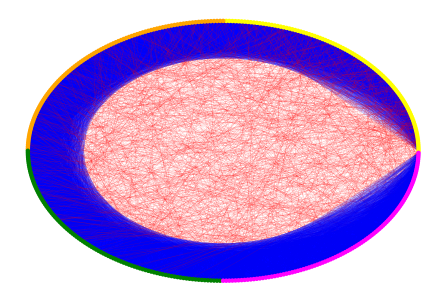

In [153]:
nx.draw_circular(G, edges = edges,node_color = colorNodes, edge_color = colors, **options)